# Jest to wersja "step by step"
# Każda linijka będzie opisana komentarzem. 

Powstała ona w celu nauki własnej i lepszego zrozumienia pisanego kodu i operacji wykonywanych na danych


# Predykcja wytrzymałości betonu na ściskanie



Poniższa baza powstała w zakładzie prefabrykacji podczas zarobów próbnych i testowej produkcji betonu.

Zawiera ona informacje z naważania składników oraz wytrzymałość na ściskanie po określonej ilości dni

W celu zwiększenia ilości próbek w danych wsadowych uwzględniono również wyniki badań kostek "świadków" w wieku od 90 do 365 dni oraz zbiór danych z serwisu kaggle.com


# Importowanie niezbędnych bibliotek

W poniższym kroku zaimportowałem następijące biblioteki:

    a) Pandas - odpowiedzialną za operację na danych
    
    b) Matplotlib - bibliotekę służącą do generowania wykresów
    
    c) Seaborn - bibliotekę, niejako nakładkę na matplotlib która umożliwia rysowanie ładniejszych wykresów i ma wbudowane domyślne wykresy staytstyczne
    
    d) Numpy - biblioteka odpowiedzialna za operacje numeryczne

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


Wczytanie pliku bazy danych

W poniższym kroku wczytuję dane z pliku .csv
literka "r" przed stringiem oznacza "raw input" przez co nie ma problemów ze znakami ucieczki

In [2]:
path = r"C:\Users\Damian\Desktop\xD\Projekty\concrete-strenght-calculator\concrete.csv" #sciezka do bazy danych

Do zmiennej beton przypisuję obiekt "dataframe" odczytany z pliku .csv za pomocą wbudowanej metody pandasa ".read_csv(ścieżka)"

In [3]:
beton = pd.read_csv(path)

In [4]:
beton


,cement [kg/m3],żużel_wielkopiecowy [kg/m3],popiół_lotny [kg/m3],woda [kg/m3],superplastyfikator [kg/m3],kruszywo_grube [kg/m3],kruszywo_drobne [kg/m3],wiek [dni],wytrzymałość [MPa]
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


Teraz przedstawimy dane wsadowe

metoda .info() przedstawia inforacje o obiekcie dataframe przyisanym wcześniej do zmiennej "beton"

In [5]:
beton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cement [kg/m3]               1030 non-null   float64
 1   żużel_wielkopiecowy [kg/m3]  1030 non-null   float64
 2   popiół_lotny [kg/m3]         1030 non-null   float64
 3   woda [kg/m3]                 1030 non-null   float64
 4   superplastyfikator [kg/m3]   1030 non-null   float64
 5   kruszywo_grube [kg/m3]       1030 non-null   float64
 6   kruszywo_drobne [kg/m3]      1030 non-null   float64
 7   wiek [dni]                   1030 non-null   int64  
 8   wytrzymałość [MPa]           1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


W poniższych krokach za pomocą metody .describe() tworzę szybką statystykę moich danych a za pomocą transpozycji transponuję do wygodniejszej formy

In [6]:
opis = beton.describe()
opis.transpose()

,count,mean,std,min,25%,50%,75%,max
cement [kg/m3],1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
żużel_wielkopiecowy [kg/m3],1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
popiół_lotny [kg/m3],1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
woda [kg/m3],1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastyfikator [kg/m3],1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
kruszywo_grube [kg/m3],1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
kruszywo_drobne [kg/m3],1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
wiek [dni],1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
wytrzymałość [MPa],1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


Dane nie zawierają wartości pustych. Baza danych jest spójna.
Dodatkowo możemy wywnioskować wzrost wytrzymałości na ściskanie wraz ze wzrostem czasu dojrzewania betonu
Przejdźmy teraz do opracowania wykresów gęstości naszych danych
    

W celu narysowania wykresu gęstości (sns.distplot) tworzę pętlę po wszystkich kolumnach obiektu dataframe (czyli naszej zmiennej beton)

Dla każdej kolumny narysuj wykres gęstości oraz go pokaż.

<Figure size 720x576 with 0 Axes>

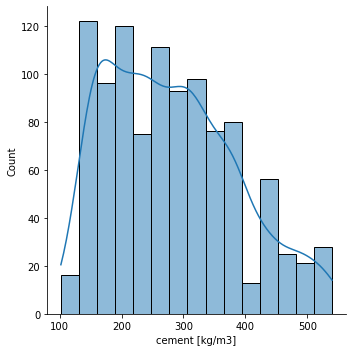

<Figure size 720x576 with 0 Axes>

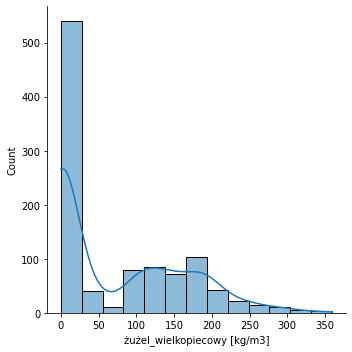

<Figure size 720x576 with 0 Axes>

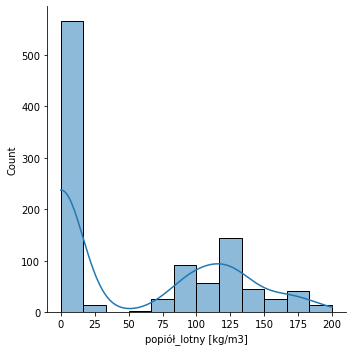

<Figure size 720x576 with 0 Axes>

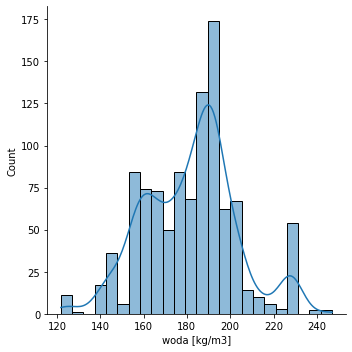

<Figure size 720x576 with 0 Axes>

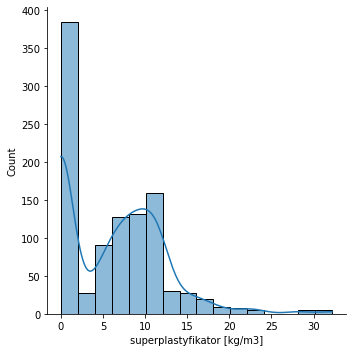

<Figure size 720x576 with 0 Axes>

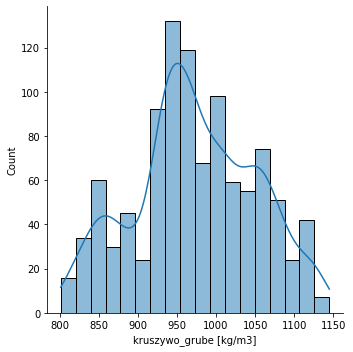

<Figure size 720x576 with 0 Axes>

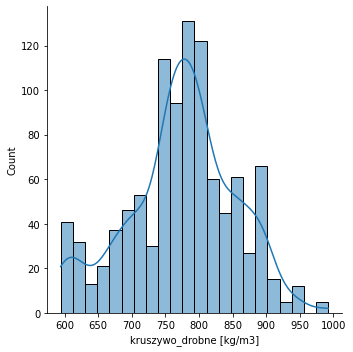

<Figure size 720x576 with 0 Axes>

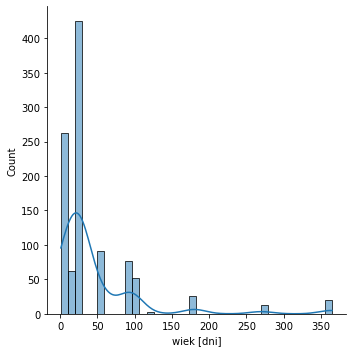

<Figure size 720x576 with 0 Axes>

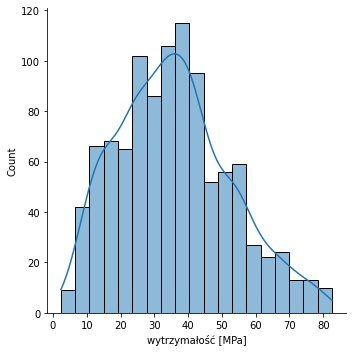

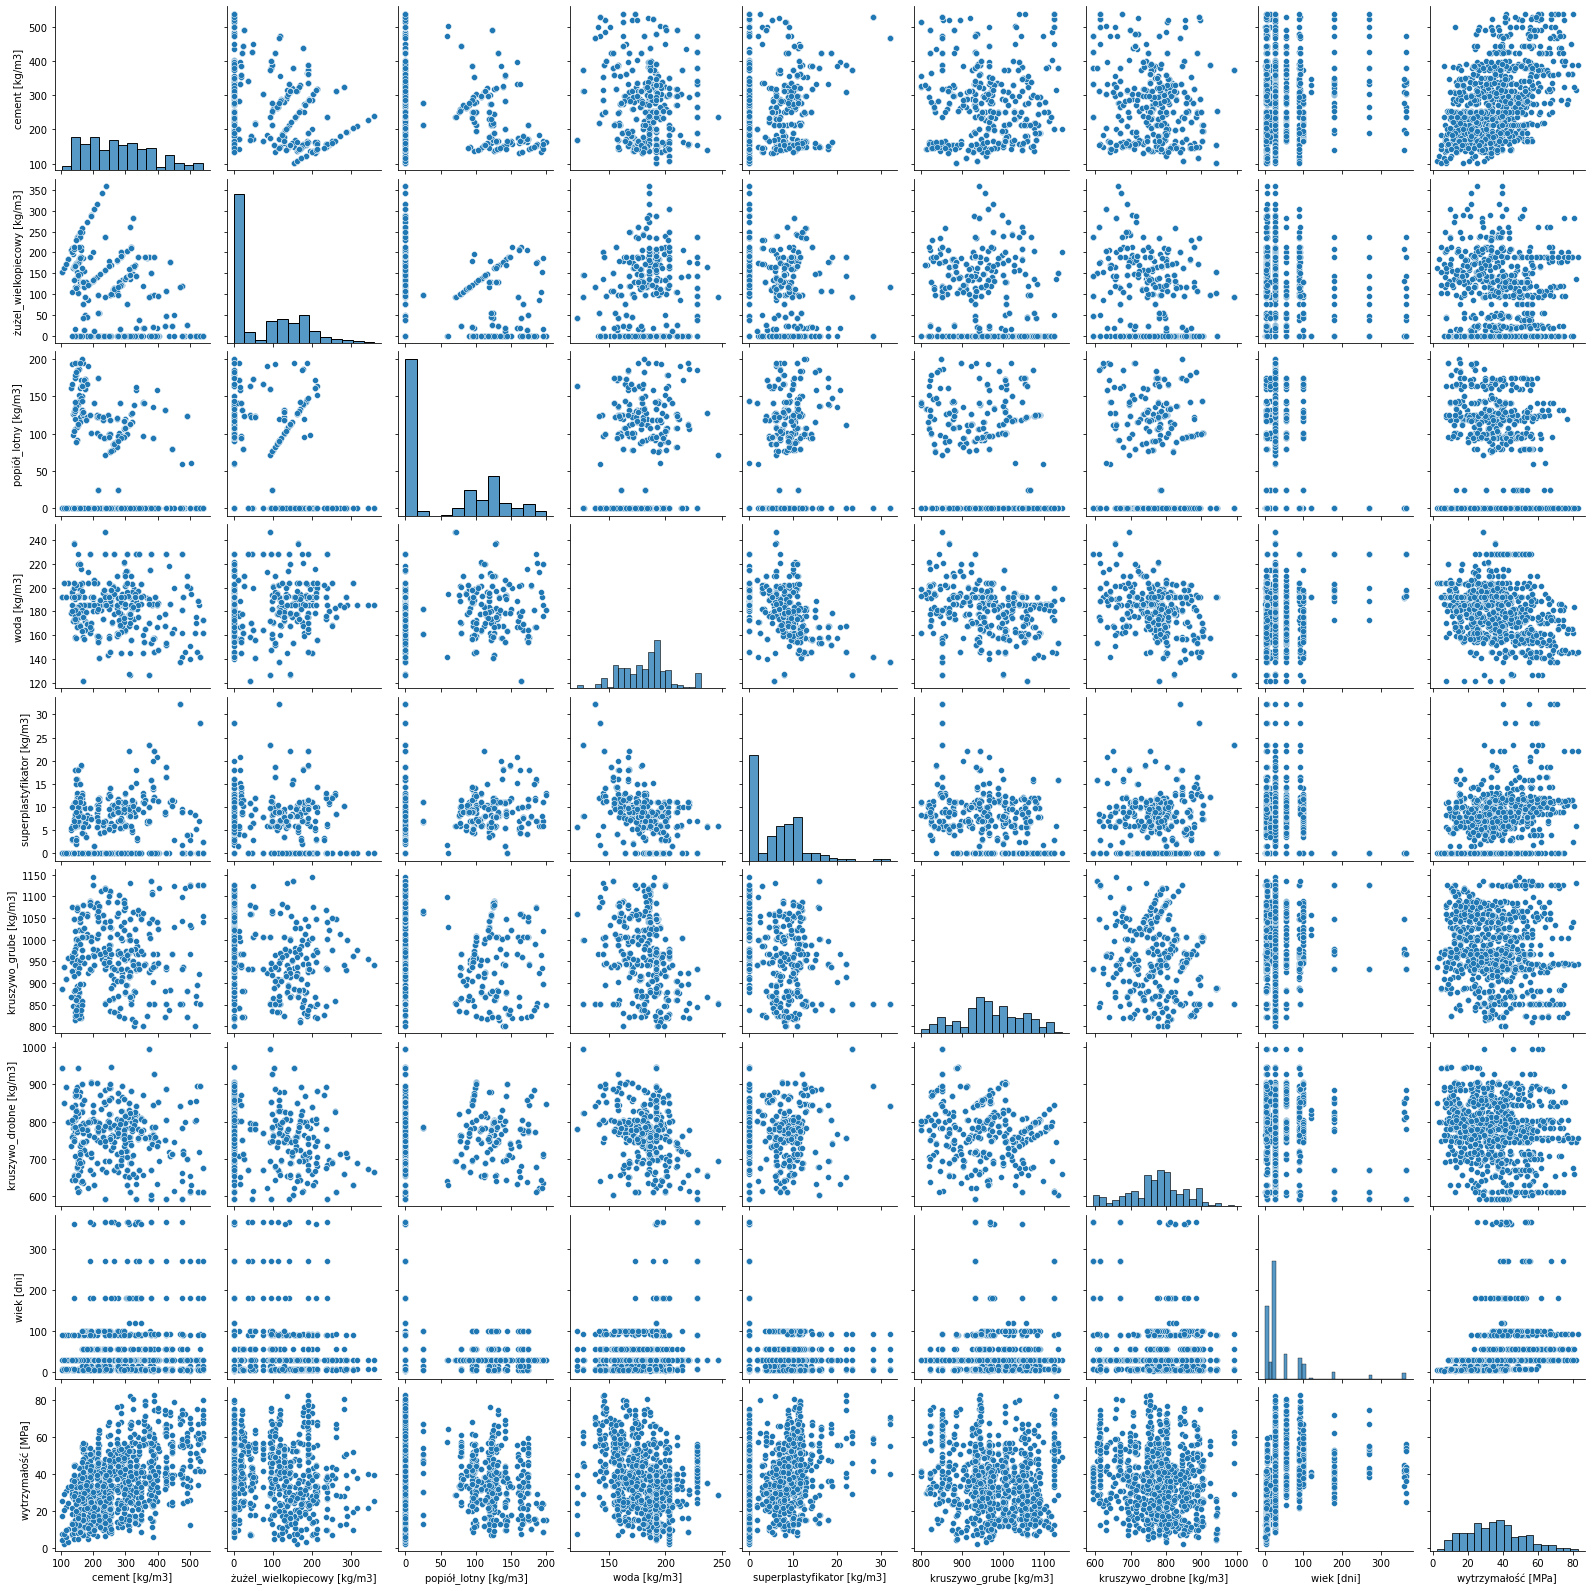

In [7]:
for i in beton.columns:
    plt.figure(figsize=(10,8))
    sns.displot(beton[i], kde=True)
    plt.show()
    
sns.pairplot(beton)


# Wartości odstające

Wartości odstające, których nie daje się wyjaśnić, są zwane wartościami odstającymi. Obserwacje te są niespójne z pozostałymi danymi szeregu i mogą drastycznie wpłynąć na analizę, a w efekcie pogorszyć możliwości prognozowania modelu.

Wartości takie występują powszechnie w szczególności podczas analizy wyników wytrzymałości betonu na rozciąganie przy rozłupywaniu.


Tutaj trochę będzie pisania :)

Definicje:

Kwamtyl - Wartość cechy, która dzieli uporządkowaną zbiorowość statystyczną na dwie części w taki sposób, że 25% jednostek zbiorowości ma wartości cechy mniejsze lub równe wartości kwartyla pierwszego, a 75% jednostek badanej zbiorowości ma wartości cechy większe lub równe wartości kwartyla pierwszego.
Źródło: https://stat.gov.pl/metainformacje/slownik-pojec/pojecia-stosowane-w-statystyce-publicznej/2896,pojecie.html

df.iloc[:] - indeksator oparty na lokalizacji etykiety kolumn. Np beton.iloc[0:3] zwróci nam 3 pierwsze wpisy. df.iloc[:] zwraca nam wszystkie wartości czyli niejako całą tabelę
    
Ogólnie więc w celu policzenia roztępu międzykwantylowego czyli różnicy pomiędzy trzecim kwartylem i pierwszym kwartylem badanej cechy (ponieważ pomiędzy tymi kwartylami znajduje się 50% wszystkich obserwacji, dlatego im większa szerokość rozstępu ćwiartkowego, tym większe zróżnicowanie (miary zróżnicowania) badanej cechy statystycznej w próbie.) należy najpoerw obliczyć pierwszy kwantyl (q1) oraz trzeci kwantyl (q3)

Następnie odejmujemy wartość pierwszego kwantylu (q1) od trzeciego kwantylu (q3)

    


In [8]:
q1=beton.quantile(0.25) #Pierwszy kwantyl
q3=beton.quantile(0.75) #Trzeci kwantyl
IQR=q3-q1 #Rozstęp międzykwanylowy

print("Pierwszy kwantyl\n----")
print(q1)
print("\nTrzeci kwantyl\n----")
print(q3)
print("\nRozstęp ćwiartkowy\n----")
print(IQR)

Pierwszy kwantyl
----
cement [kg/m3]                 192.375
żużel_wielkopiecowy [kg/m3]      0.000
popiół_lotny [kg/m3]             0.000
woda [kg/m3]                   164.900
superplastyfikator [kg/m3]       0.000
kruszywo_grube [kg/m3]         932.000
kruszywo_drobne [kg/m3]        730.950
wiek [dni]                       7.000
wytrzymałość [MPa]              23.710
Name: 0.25, dtype: float64

Trzeci kwantyl
----
cement [kg/m3]                  350.000
żużel_wielkopiecowy [kg/m3]     142.950
popiół_lotny [kg/m3]            118.300
woda [kg/m3]                    192.000
superplastyfikator [kg/m3]       10.200
kruszywo_grube [kg/m3]         1029.400
kruszywo_drobne [kg/m3]         824.000
wiek [dni]                       56.000
wytrzymałość [MPa]               46.135
Name: 0.75, dtype: float64

Rozstęp ćwiartkowy
----
cement [kg/m3]                 157.625
żużel_wielkopiecowy [kg/m3]    142.950
popiół_lotny [kg/m3]           118.300
woda [kg/m3]                    27.100
superplasty

In [9]:
cwo=((beton.iloc[:] <(q1-1.5*IQR)) | (beton.iloc[:]>(q3+1.5*IQR))).sum(axis=0) # '|' - Operator bitowy

print("\nLiczba kolumn z outlinerami\n----")
print(cwo)


Liczba kolumn z outlinerami
----
cement [kg/m3]                  0
żużel_wielkopiecowy [kg/m3]     2
popiół_lotny [kg/m3]            0
woda [kg/m3]                    9
superplastyfikator [kg/m3]     10
kruszywo_grube [kg/m3]          0
kruszywo_drobne [kg/m3]         5
wiek [dni]                     59
wytrzymałość [MPa]              4
dtype: int64


Tworzenie obiektu dataframe do dalszych operacji poprzez stworzenie nowego obiektu dataframe opdf i dodanie nowej kolumny z wartością procentową

In [10]:
opdf=pd.DataFrame(cwo,index=beton.columns,columns=["Liczba wartości odstających"])
opdf["Procentowa zawartość wartości odstających w danej kolumnie"]=round(opdf["Liczba wartości odstających"]*100/len(beton),2)


In [11]:
opdf

,Liczba wartości odstających,Procentowa zawartość wartości odstających w danej kolumnie
cement [kg/m3],0,0.00
żużel_wielkopiecowy [kg/m3],2,0.19
popiół_lotny [kg/m3],0,0.00
woda [kg/m3],9,0.87
superplastyfikator [kg/m3],10,0.97
kruszywo_grube [kg/m3],0,0.00
kruszywo_drobne [kg/m3],5,0.49
wiek [dni],59,5.73
wytrzymałość [MPa],4,0.39


W tym kroku robimy funkcję która zwraca nam 1 jeżeli dana wartość jest w poza kwantylem a 0 jeżeli się mieści w przedziale

In [12]:
rwo=(((beton[:]<(q1-1.5*IQR))|(beton[:]>(q3+1.5*IQR))).sum(axis=1))
rwo

0       0
1       0
2       0
3       0
4       0
       ..
1025    0
1026    1
1027    0
1028    1
1029    0
Length: 1030, dtype: int64

Teraz wyprintujemy ilość wartości odstających

In [13]:
print(rwo.sum())

89


Teraz liczymi jaki procent jest w danych wierszach odstających wartości. 

In [14]:
ro005=(((rwo/len(beton.columns))<0.05).sum())*100/len(beton)
ro01=(((rwo/len(beton.columns))<0.1).sum())*100/len(beton)
ro015=(((rwo/len(beton.columns))<0.15).sum())*100/len(beton)
ro02=(((rwo/len(beton.columns))<0.2).sum())*100/len(beton)
ro025=(((rwo/len(beton.columns))<0.25).sum())*100/len(beton)
ro03=(((rwo/len(beton.columns))<0.30).sum())*100/len(beton)
ro035=(((rwo/len(beton.columns))<=0.35).sum())*100/len(beton)
ro04=(((rwo/len(beton.columns))<=0.4).sum())*100/len(beton)
ro045=(((rwo/len(beton.columns))<=0.45).sum())*100/len(beton)
ro05=(((rwo/len(beton.columns))<=0.50).sum())*100/len(beton)
ro055=(((rwo/len(beton.columns))<0.55).sum())*100/len(beton)
ro06=(((rwo/len(beton.columns))<0.6+0).sum())*100/len(beton)
ro=pd.DataFrame(np.round([ro005,ro01,ro015,ro02,ro025,ro03,ro035,ro04,ro045,ro05,ro055,ro06],2),
             index=['5%','10%','15%','20%','25%','30%','35%','40%','45%','50%','55%','60%'],
            columns=['% Data'])
ro.index.name='% Wartości odstających w danym wierszu'

ro

,% Data
% Wartości odstających w danym wierszu,
5%,91.36
10%,91.36
15%,100.00
20%,100.00
25%,100.00
30%,100.00
35%,100.00
40%,100.00
45%,100.00


W każdym wierszu nie występuje więcej niż 10% wartości odstających. W związku z tym nieliczne wartości odstające zostaną potraktowane przy użyciu metody MICE (Multiple Imputation using Chained Equations) po przekształceniu tych wartości odstających na wartości NaN.

In [15]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [16]:
imp = IterativeImputer()
imp.fit(beton)
beton=pd.DataFrame(imp.transform(beton),columns=beton.columns)

Można więc zauważyć, że wszystkie wartości odstające zostały usunięte poprzez przekształcenie ich na wartości NaN i imputację przy użyciu MICE.

In [17]:
beton.isnull().sum()

cement [kg/m3]                 0
żużel_wielkopiecowy [kg/m3]    0
popiół_lotny [kg/m3]           0
woda [kg/m3]                   0
superplastyfikator [kg/m3]     0
kruszywo_grube [kg/m3]         0
kruszywo_drobne [kg/m3]        0
wiek [dni]                     0
wytrzymałość [MPa]             0
dtype: int64

In [18]:
g=beton.groupby("wiek [dni]")
g1=g.get_group(1)
g3=g.get_group(3)
g7=g.get_group(7)
g14=g.get_group(14)
g28=g.get_group(28)
pd.DataFrame(round(g28.iloc[:,-1].sort_values()).unique(),columns=["wytrzymałość_na_ściskanie [MPa]"])

,wytrzymałość_na_ściskanie [MPa]
0,9.0
1,10.0
2,11.0
3,12.0
4,13.0
...,...
62,75.0
63,76.0
64,79.0
65,80.0


In [19]:
beton.corr()

,cement [kg/m3],żużel_wielkopiecowy [kg/m3],popiół_lotny [kg/m3],woda [kg/m3],superplastyfikator [kg/m3],kruszywo_grube [kg/m3],kruszywo_drobne [kg/m3],wiek [dni],wytrzymałość [MPa]
cement [kg/m3],1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
żużel_wielkopiecowy [kg/m3],-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
popiół_lotny [kg/m3],-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
woda [kg/m3],-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastyfikator [kg/m3],0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
kruszywo_grube [kg/m3],-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
kruszywo_drobne [kg/m3],-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
wiek [dni],0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
wytrzymałość [MPa],0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


[]

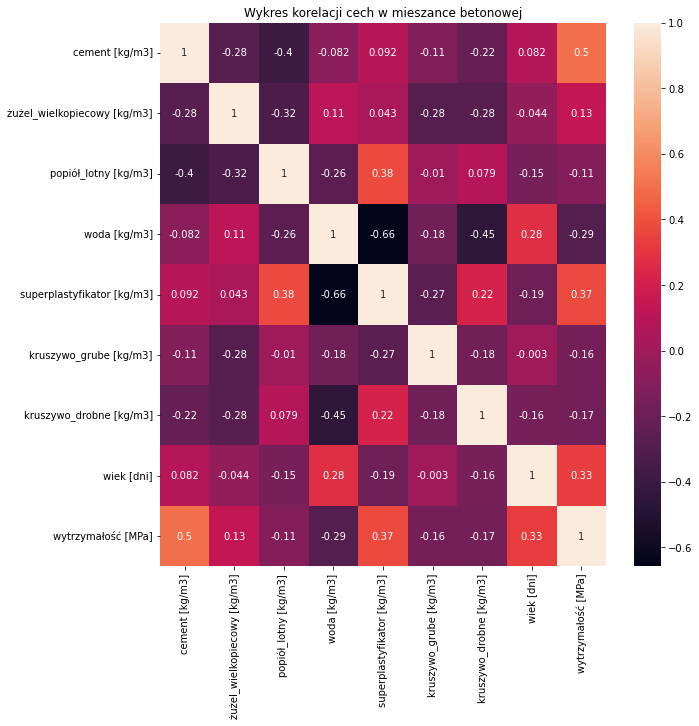

In [20]:
plt.figure(figsize=(10,10))
plt.title("Wykres korelacji cech w mieszance betonowej")
sns.heatmap(beton.corr(),annot=True)
plt.plot()

Z powyższego wykresu możemy wywnioskować dodatnią korelację pomiędzy wytrzymałością na ściskanie a zawartością cementu, superplastyfikatora.

Dodatkowo możemy zaobserować spadek ilości wody przy zastosowaniu superplastyfikatora co potwierdza prawidłowość naszych danych.

Nie mniej jednak żadna z cech nie jest silnie skorelowana ani skorelowana ze zmienną docelową (0,7<|r|≤0,9)


# Regresja liniowa

In [21]:
import statsmodels.api as sm
col = int(len(beton.columns))
col -= 1


In [22]:
X=beton.iloc[:,:col] #Zwracam zakres kolumn w obiekcie DataFrame czyli od 1 kolumny do 7 (Do wieku. Ostatnią przewiduję)
X

,cement [kg/m3],żużel_wielkopiecowy [kg/m3],popiół_lotny [kg/m3],woda [kg/m3],superplastyfikator [kg/m3],kruszywo_grube [kg/m3],kruszywo_drobne [kg/m3],wiek [dni]
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0
...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28.0
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3.0
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270.0


In [23]:
Y=beton.iloc[:,col] #Zwracam jedną kolumne (1 wymiar) dla danych które chcę przewidywać czyli ostatnią kolumnę
Y

0       29.89
1       23.51
2       29.22
3       45.85
4       18.29
        ...  
1025    13.29
1026    41.30
1027    44.28
1028    55.06
1029    52.61
Name: wytrzymałość [MPa], Length: 1030, dtype: float64

In [24]:
ls=sm.OLS(Y,sm.add_constant(X))
wynik=ls.fit()
wynik.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     wytrzymałość [MPa]   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     204.3
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          6.29e-206
Time:                        16:49:32   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -23.3312     26.586     -0.878      0.380     -75.500      28.837
cement [kg/m3]                  0.1198      0.008     14.113      0.000       0.103       0.136
żużel_wielkopiecowy [kg/m3]     0.1039      0.010     10.247      0.000       0.084       0.124
popiół_lotny [kg/m3]            0.0879      0.013      6.988      0.000       0.063       0.113
woda [kg/m3]                   -0.1499      0.040     -3.731      0.000      -0.229      -0.071
superplastyfikator [kg/m3]      0.2922      0.093      3.128      0.002       0.109       0.476
kruszywo_grube [kg/m3]          0.0181      0.009      1.926      0.054      -0.000       0.037
kruszywo_drobne [kg/m3]         0.0202      0.011      1.887      0.059      -0.001       0.041
wiek [dni]                      0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.304
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Widzimy, że składnik stały ma wartość P większą od 0,05, czyli od założonego poziomu istotności, dlatego usuwamy składnik stały z modelowania.


In [25]:
ls=sm.OLS(Y,X)
wynik=ls.fit()
wynik.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     wytrzymałość [MPa]   R-squared (uncentered):                   0.931
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              1732.
Date:                Mon, 04 Apr 2022   Prob (F-statistic):                        0.00
Time:                        16:49:32   Log-Likelihood:                         -3869.4
No. Observations:                1030   AIC:                                      7755.
Df Residuals:                    1022   BIC:                                      7794.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
cement [kg/m3]                  0.1134      0.004     26.692      0.000       0.105       0.122
żużel_wielkopiecowy [kg/m3]     0.0962      0.005     18.488      0.000       0.086       0.106
popiół_lotny [kg/m3]            0.0793      0.008     10.077      0.000       0.064       0.095
woda [kg/m3]                   -0.1822      0.016    -11.345      0.000      -0.214      -0.151
superplastyfikator [kg/m3]      0.2647      0.088      3.008      0.003       0.092       0.437
kruszywo_grube [kg/m3]          0.0103      0.003      3.364      0.001       0.004       0.016
kruszywo_drobne [kg/m3]         0.0113      0.004      3.188      0.001       0.004       0.018
wiek [dni]                      0.1140      0.005     21.031      0.000       0.103       0.125
==============================================================================
Omnibus:                        5.325   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                5.269
Skew:                          -0.175   Prob(JB):                       0.0717
Kurtosis:                       3.031   Cond. No.                         354.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Uwagi:

[1] R² oblicza się bez wypośrodkowania (niewypośrodkowane), ponieważ model nie zawiera stałej.

[2] Błędy standardowe zakładają, że macierz kowariancji błędów jest prawidłowo określona.

Podział na zbiór danych restowych i treningowych

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X, Y, random_state=150, test_size=0.3 )


In [27]:
X_train

,cement [kg/m3],żużel_wielkopiecowy [kg/m3],popiół_lotny [kg/m3],woda [kg/m3],superplastyfikator [kg/m3],kruszywo_grube [kg/m3],kruszywo_drobne [kg/m3],wiek [dni]
1012,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,90.0
276,166.0,260.0,0.0,183.0,13.0,859.0,827.0,28.0
236,213.7,98.1,24.5,181.7,6.9,1065.8,785.4,3.0
537,387.0,20.0,94.0,157.0,13.9,938.0,845.0,56.0
494,277.2,97.8,24.5,160.7,11.2,1061.7,782.5,3.0
...,...,...,...,...,...,...,...,...
764,151.0,0.0,185.0,167.0,16.0,1074.0,678.0,28.0
306,198.6,132.4,0.0,192.0,0.0,978.4,825.5,90.0
496,218.9,0.0,124.1,158.5,11.3,1078.7,794.9,100.0
25,310.0,143.0,0.0,168.0,10.0,914.0,804.0,28.0


In [28]:
X_test

,cement [kg/m3],żużel_wielkopiecowy [kg/m3],popiół_lotny [kg/m3],woda [kg/m3],superplastyfikator [kg/m3],kruszywo_grube [kg/m3],kruszywo_drobne [kg/m3],wiek [dni]
926,475.0,118.8,0.0,181.1,8.9,852.1,781.5,7.0
58,295.7,0.0,95.6,171.5,8.9,955.1,859.2,14.0
225,313.3,0.0,113.0,178.5,8.0,1001.9,688.7,28.0
381,194.7,0.0,100.5,165.6,7.5,1006.4,905.9,28.0
461,334.0,17.6,158.0,189.0,15.3,967.0,633.0,28.0
...,...,...,...,...,...,...,...,...
224,220.8,147.2,0.0,185.7,0.0,1055.0,744.3,28.0
513,164.0,0.0,200.0,181.0,13.0,849.0,846.0,28.0
162,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,7.0
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100.0


In [29]:
y_train

1012    29.39
276     37.91
236     18.00
537     47.97
494     30.45
        ...  
764     13.46
306     38.07
496     46.23
25      45.30
442     35.75
Name: wytrzymałość [MPa], Length: 721, dtype: float64

In [30]:
y_test

926    55.60
58     35.23
225    36.80
381    25.72
461    44.33
       ...  
224    25.75
513    15.09
162    18.13
462    39.23
874    41.10
Name: wytrzymałość [MPa], Length: 309, dtype: float64

In [31]:
lr=LinearRegression()

lr.fit(X_train,y_train)
z = lr.predict(X_train.iloc[[2],:]) #Przykład dla jakiejś tablicy.
z[0]

24.72867343057944

In [32]:
X_train.iloc[[2],:]

,cement [kg/m3],żużel_wielkopiecowy [kg/m3],popiół_lotny [kg/m3],woda [kg/m3],superplastyfikator [kg/m3],kruszywo_grube [kg/m3],kruszywo_drobne [kg/m3],wiek [dni]
236,213.7,98.1,24.5,181.7,6.9,1065.8,785.4,3.0


In [33]:
X_train.iloc[0,3]/X_train.iloc[0,0] # Obliczanie stosunku wodno-cementowego informacyjnie w sumie

0.6486486486486487

In [34]:
print('Ocena modelu: ',lr.score(X_train,y_train))
y_pred_lrtr=lr.predict(X_train)
y_pred_lrte=lr.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error

print('Ocena modelu treningowego R2 : ',r2_score(y_train,y_pred_lrtr))
print('Ocena modelu testowego R2 : ',r2_score(y_test,y_pred_lrte))

Ocena modelu:  0.6278843231627502
Ocena modelu treningowego R2 :  0.6278843231627502
Ocena modelu testowego R2 :  0.5777703561977287


In [35]:
lr.score(X_train,y_train) == r2_score(y_train,y_pred_lrtr)

True

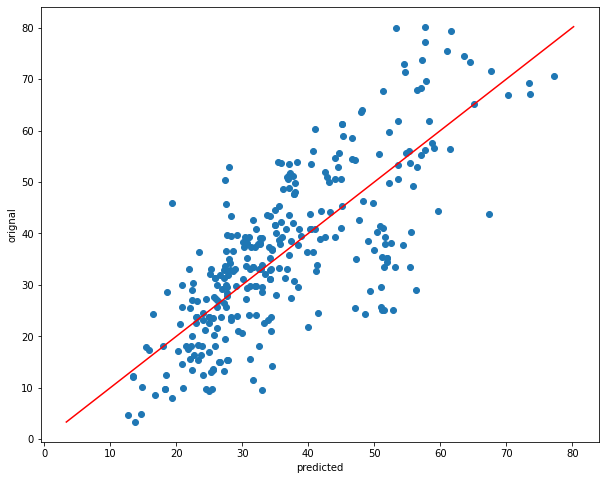

In [36]:
plt.figure(figsize=(10,8))
plt.scatter(y_pred_lrte,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

In [37]:
X_train.iloc[[2],:]

,cement [kg/m3],żużel_wielkopiecowy [kg/m3],popiół_lotny [kg/m3],woda [kg/m3],superplastyfikator [kg/m3],kruszywo_grube [kg/m3],kruszywo_drobne [kg/m3],wiek [dni]
236,213.7,98.1,24.5,181.7,6.9,1065.8,785.4,3.0


In [38]:
z = lr.predict(X_train.iloc[[2],:]) #Przykład dla jakiejś tablicy.
z[0]

24.72867343057944

In [39]:
pf = PolynomialFeatures(degree = 2)
X_polytr = pf.fit_transform(X_train)
lr.fit(X_polytr,y_train)
y_pred_lr2tr = lr.predict(X_polytr)
print("Training R2 - degree 2 polynomial: ",r2_score(y_train, y_pred_lr2tr ))
X_polyte = pf.fit_transform(X_test)
y_pred_lr2te= lr.predict(X_polyte)
print("Test R2 - degree 2 polynomial: ",r2_score(y_test,y_pred_lr2te))

Training R2 - degree 2 polynomial:  0.8267455408520514
Test R2 - degree 2 polynomial:  0.7468669009909144


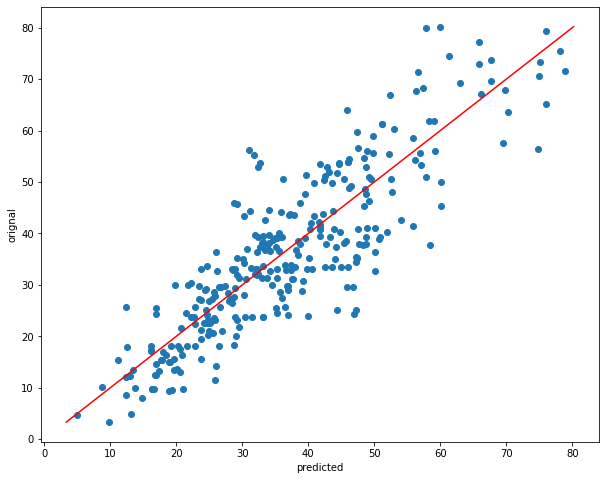

In [40]:
plt.figure(figsize=(10,8))
plt.scatter(y_pred_lr2te,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

In [41]:
pf = PolynomialFeatures(degree = 3)
X_polytr = pf.fit_transform(X_train)
lr.fit(X_polytr,y_train)
y_pred_lr2tr = lr.predict(X_polytr)
print("Training R2 - degree 2 polynomial: ",r2_score(y_train, y_pred_lr2tr ))
X_polyte = pf.fit_transform(X_test)
y_pred_lr2te= lr.predict(X_polyte)
print("Test R2 - degree 2 polynomial: ",r2_score(y_test,y_pred_lr2te))

Training R2 - degree 2 polynomial:  0.9326560127900261
Test R2 - degree 2 polynomial:  0.8020855882397298


In [42]:
X_train.iloc[[2],:]

,cement [kg/m3],żużel_wielkopiecowy [kg/m3],popiół_lotny [kg/m3],woda [kg/m3],superplastyfikator [kg/m3],kruszywo_grube [kg/m3],kruszywo_drobne [kg/m3],wiek [dni]
236,213.7,98.1,24.5,181.7,6.9,1065.8,785.4,3.0


In [43]:
przyklad = pf.fit_transform(X_train.iloc[[2],:])
z = lr.predict(przyklad) #Przykład dla jakiejś tablicy.
z[0]


17.55631765272028

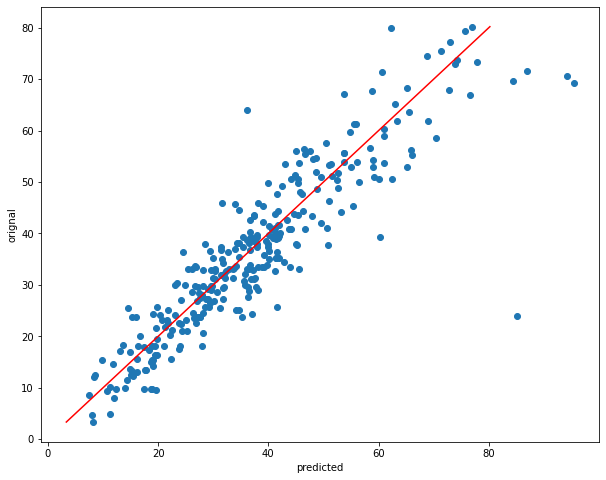

In [44]:
plt.figure(figsize=(10,8))
plt.scatter(y_pred_lr2te,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

In [45]:
pf = PolynomialFeatures(degree = 4)
X_polytr = pf.fit_transform(X_train)
lr.fit(X_polytr,y_train)
y_pred_lr2tr = lr.predict(X_polytr)
print("Training R2 - degree 2 polynomial: ",r2_score(y_train, y_pred_lr2tr ))
X_polyte = pf.fit_transform(X_test)
y_pred_lr2te= lr.predict(X_polyte)
print("Test R2 - degree 2 polynomial: ",r2_score(y_test,y_pred_lr2te))


Training R2 - degree 2 polynomial:  0.9844129018039411
Test R2 - degree 2 polynomial:  -49.11651340897536


In [46]:
X_train.iloc[[2],:]

,cement [kg/m3],żużel_wielkopiecowy [kg/m3],popiół_lotny [kg/m3],woda [kg/m3],superplastyfikator [kg/m3],kruszywo_grube [kg/m3],kruszywo_drobne [kg/m3],wiek [dni]
236,213.7,98.1,24.5,181.7,6.9,1065.8,785.4,3.0


In [47]:
przyklad = pf.fit_transform(X_train.iloc[[2],:])
z = lr.predict(przyklad) #Przykład dla jakiejś tablicy.
z[0]

16.631908109178767

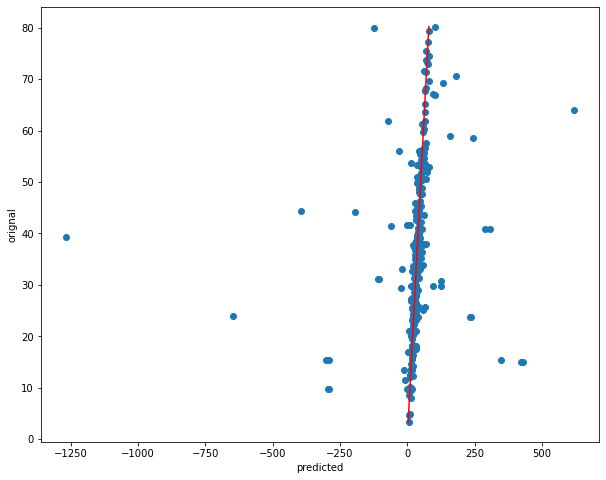

In [48]:
plt.figure(figsize=(10,8))
plt.scatter(y_pred_lr2te,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

In [49]:
from sklearn.tree import DecisionTreeRegressor


In [50]:
model = DecisionTreeRegressor(max_depth=20, min_samples_split=7)

In [51]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20, min_samples_split=7)

In [52]:
model.score(X_test, y_test)

0.8210698860288551

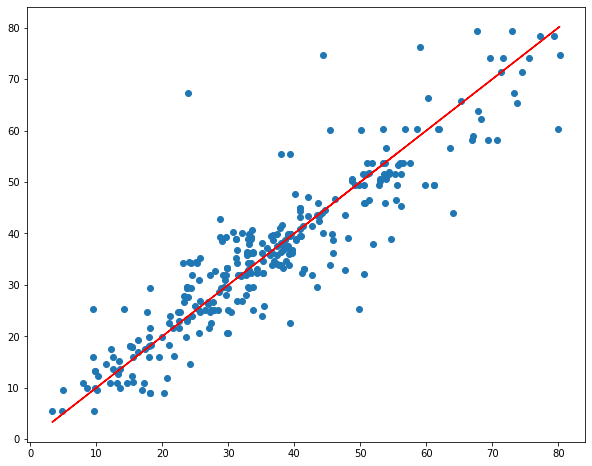

In [53]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, model.predict(X_test))
plt.plot(y_test, y_test, c="r")
plt.show()

In [54]:
from sklearn.tree import plot_tree

[Text(0.465125967603211, 0.96875, 'X[7] <= 21.0\nsquared_error = 287.818\nsamples = 721\nvalue = 35.599'),
 Text(0.20907396788990826, 0.90625, 'X[0] <= 354.0\nsquared_error = 154.623\nsamples = 235\nvalue = 22.745'),
 Text(0.13833142201834864, 0.84375, 'X[7] <= 10.5\nsquared_error = 69.875\nsamples = 168\nvalue = 17.766'),
 Text(0.07368119266055045, 0.78125, 'X[6] <= 683.45\nsquared_error = 42.12\nsamples = 127\nvalue = 14.894'),
 Text(0.04931192660550459, 0.71875, 'X[5] <= 1006.15\nsquared_error = 48.6\nsamples = 7\nvalue = 27.856'),
 Text(0.04472477064220184, 0.65625, 'squared_error = 13.274\nsamples = 6\nvalue = 25.365'),
 Text(0.05389908256880734, 0.65625, 'squared_error = -0.0\nsamples = 1\nvalue = 42.8'),
 Text(0.09805045871559633, 0.71875, 'X[0] <= 255.25\nsquared_error = 31.371\nsamples = 120\nvalue = 14.138'),
 Text(0.06307339449541284, 0.65625, 'X[4] <= 5.75\nsquared_error = 20.394\nsamples = 82\nvalue = 12.454'),
 Text(0.034403669724770644, 0.59375, 'X[0] <= 161.9\nsquared_e

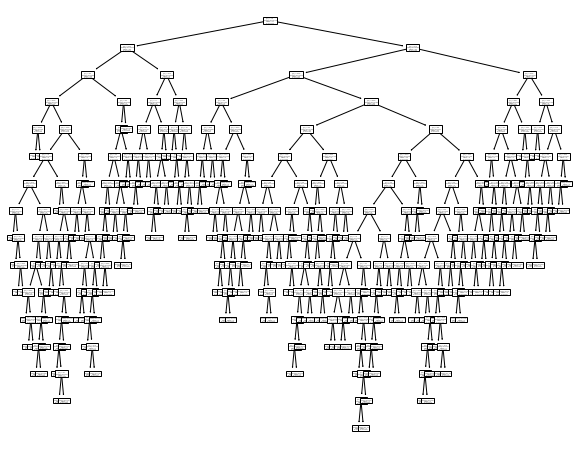

In [55]:
plt.figure(figsize=(10,8))
plot_tree(model)



In [56]:
X_test.columns

Index(['cement [kg/m3]', 'żużel_wielkopiecowy [kg/m3]', 'popiół_lotny [kg/m3]',
       'woda [kg/m3]', 'superplastyfikator [kg/m3]', 'kruszywo_grube [kg/m3]',
       'kruszywo_drobne [kg/m3]', 'wiek [dni]'],
      dtype='object')

# Optymalizacja modelu

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

0.9055535263376575


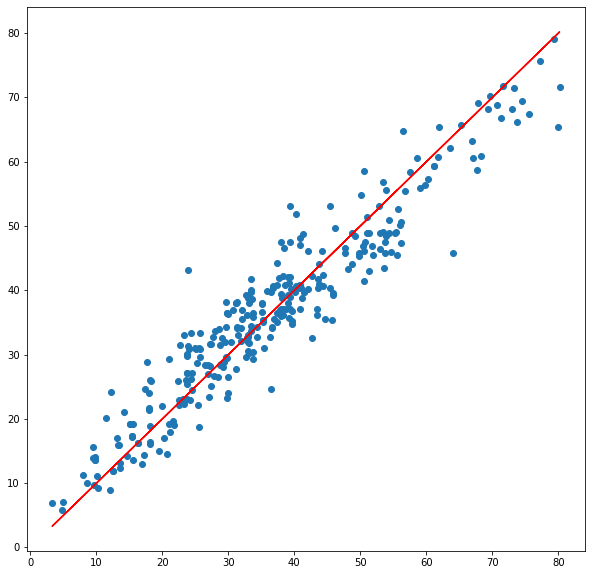

In [58]:
model2 = GradientBoostingRegressor()
model2.fit(X_train, y_train)
print(model2.score(X_test, y_test))
plt.figure(figsize=(10,10))
plt.scatter(y_test, model2.predict(X_test))
plt.plot(y_test, y_test, c="r")
plt.show()

In [59]:
przyklad = X_train.iloc[[2],:]
z = model2.predict(przyklad) #Przykład dla jakiejś tablicy.
z[0]

with open('modelPickle2', 'wb') as model_dt:
    pickle.dump(model2, model_dt)

In [60]:
przyklad.index[0]

236

In [61]:
beton.loc[[przyklad.index[0]], :]

,cement [kg/m3],żużel_wielkopiecowy [kg/m3],popiół_lotny [kg/m3],woda [kg/m3],superplastyfikator [kg/m3],kruszywo_grube [kg/m3],kruszywo_drobne [kg/m3],wiek [dni],wytrzymałość [MPa]
236,213.7,98.1,24.5,181.7,6.9,1065.8,785.4,3.0,18.0


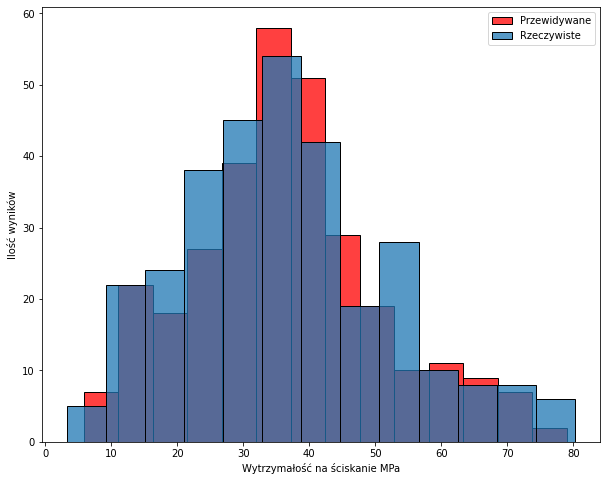

In [62]:
plt.figure(figsize=(10,8))
plt.xlabel('Wytrzymałość na ściskanie MPa')
plt.ylabel('Ilość wyników')
sns.histplot(model2.predict(X_test),label="Przewidywane",color="red")
sns.histplot(y_test,label="Rzeczywiste")
plt.legend()

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'max_depth': [i for i in range(2,100)],
              'min_samples_leaf': [i for i in range(3,100)]}]

reg = DecisionTreeRegressor()

gs = GridSearchCV(reg, param_grid=param_grid, scoring='r2', n_jobs=-1)
gs.fit(X_train, y_train)

model3 = gs.best_estimator_
print(model3.score(X_test, y_test))

0.8157345877675901


[Text(0.4547413793103448, 0.9583333333333334, 'X[7] <= 21.0\nsquared_error = 287.818\nsamples = 721\nvalue = 35.599'),
 Text(0.19310344827586207, 0.875, 'X[0] <= 354.0\nsquared_error = 154.623\nsamples = 235\nvalue = 22.745'),
 Text(0.12931034482758622, 0.7916666666666666, 'X[7] <= 10.5\nsquared_error = 69.875\nsamples = 168\nvalue = 17.766'),
 Text(0.07931034482758621, 0.7083333333333334, 'X[6] <= 683.45\nsquared_error = 42.12\nsamples = 127\nvalue = 14.894'),
 Text(0.07241379310344828, 0.625, 'squared_error = 48.6\nsamples = 7\nvalue = 27.856'),
 Text(0.08620689655172414, 0.625, 'X[0] <= 255.25\nsquared_error = 31.371\nsamples = 120\nvalue = 14.138'),
 Text(0.05517241379310345, 0.5416666666666666, 'X[4] <= 5.75\nsquared_error = 20.394\nsamples = 82\nvalue = 12.454'),
 Text(0.034482758620689655, 0.4583333333333333, 'X[0] <= 161.9\nsquared_error = 16.28\nsamples = 56\nvalue = 11.029'),
 Text(0.013793103448275862, 0.375, 'X[7] <= 5.0\nsquared_error = 9.432\nsamples = 16\nvalue = 8.308')

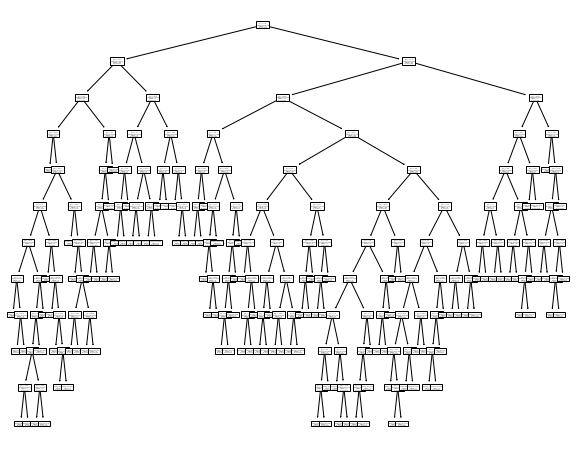

In [64]:
plt.figure(figsize=(10,8))
plot_tree(model3)


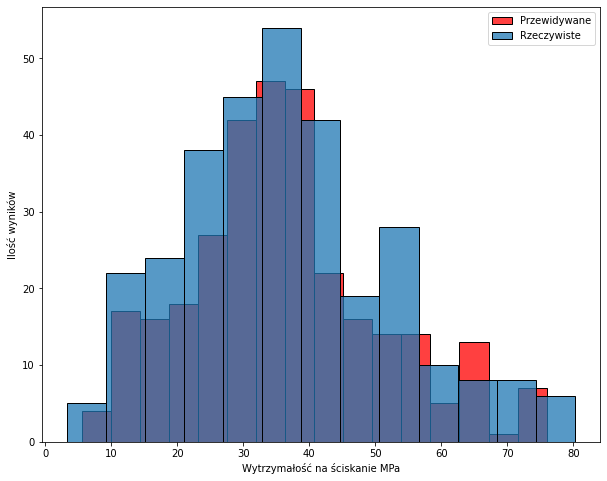

In [65]:
plt.figure(figsize=(10,8))
plt.xlabel('Wytrzymałość na ściskanie MPa')
plt.ylabel('Ilość wyników')
sns.histplot(model3.predict(X_test),label="Przewidywane",color="red")
sns.histplot(y_test,label="Rzeczywiste")
plt.legend()

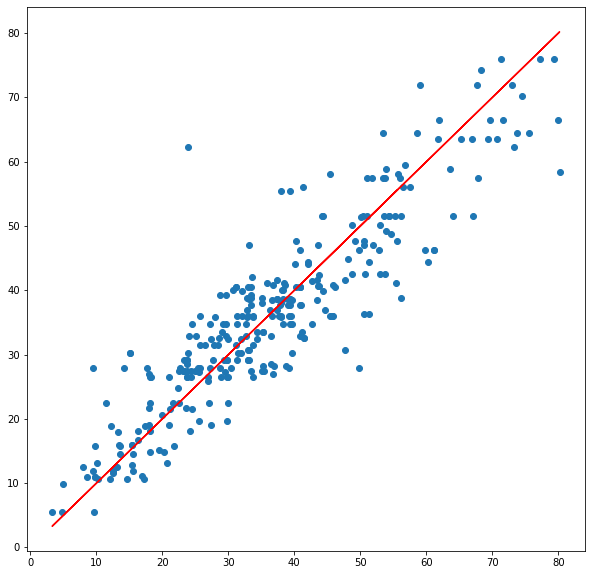

In [66]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, model3.predict(X_test))
plt.plot(y_test, y_test, c="r")
plt.show()